## Load dependencies

In [1]:
import os
import numpy as np
import pandas as pd
import photofitt
from photofitt import display
from photofitt.analysis import quantify_peaks, cumulative_activity

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load UV mitosis data:
folder = "/Users/esti/Documents/PROYECTOS/PHX/DOCS/MANUSCRIPT/CODE/"
path_data = os.path.join(folder, "data/mitosis_CHO_UV_clean.csv")
data = pd.read_csv(path_data)
print(len(data))

# Change the name of exposure times
Con = [c for c in np.unique(data["Subcategory-02"]) if c.__contains__("UV")]

for i in Con:
    new_condition_name = i.split("UV")[1]
    data["Subcategory-02"][data["Subcategory-02"]==i] = new_condition_name
## Choose a path to store the data:
output_path = os.path.join(folder, "plots")

95348


In [3]:
#new_data = pd.read_csv("/Users/esti/Documents/PROYECTOS/PHX/mitosis_mediated_data_itqb_3/CHO/results/scaled_1.5709_results/new-data/mitosis_counting.csv")
#new_data = new_data.rename(columns={'mitosis': 'Number of cells', 
#                            'mitosis_normalised': 'Norm. Number of cells'})
#index = new_data[new_data['frame'].isnull()].index.to_list()
#for i in index:
#    new_data['frame'].iloc[i]=0
#index_new_data = new_data.index.to_list()

#index_new = [i for i in index_new_data if i not in index]
#print(index_new)

#for i in index_new:
#    new_data['frame'].iloc[i]=4*(len(new_data['frame'].iloc[i]))
                                 
#new_datadata
#new_data.to_csv("/Users/esti/Documents/PROYECTOS/PHX/mitosis_mediated_data_itqb_3/CHO/results/scaled_1.5709_results/new-data/mitosis_counting.csv")

#Con = [c for c in np.unique(data["Subcategory-02"]) if c.__contains__("UV")]
#print(Con)

#for i in Con:
#    new_condition_name = i.split("UV")[1]
#    data["Subcategory-02"][data["Subcategory-02"]==i] = new_condition_name
    
#print(data)


## Estimation of cell densities for each field of view

Each well is 9.3 X 8.7 mm. Each FOV (the one in the final images) is 660 X 660 microns

- Area of each well: 80.91 mm^2
- Area of each FOV: 0.4356 mm ^2
- Total # of cells per well: 40000 per well
- Total# of cells per FOV: 215.35


In [4]:
light_power = 6.255662
well_area = 80.91
cell_density = 25000
fov_area = 660
fov_mm = (fov_area*0.001)**2
cell_mm = cell_density / well_area
cell_fov = cell_mm * fov_mm
print(cell_fov)

134.59399332591772


In [5]:
# Estimate the ligth dose
data = photofitt.utils.numerical_dose(data, column_name="Subcategory-02", power=light_power)

## Generate categorical variables for the light dose
light_dose = np.unique(data["Light dose"])
data["Light dose cat"] = ''
for l in light_dose:
    if l > 0:
        cat = np.str(np.round(l, decimals=1)) + " J/cm2"
    else:
        cat = 'non-synchro-0 J/cm2'
    
    data["Light dose cat"][data["Light dose"]==l] = cat
data["Light dose cat"][data["Subcategory-02"]=="Synchro"] = '0 J/cm2'
hue_order = ['non-synchro-0 J/cm2', '0 J/cm2', '0.2 J/cm2',
             '0.3 J/cm2', '0.6 J/cm2', '1.3 J/cm2', '2.5 J/cm2',
             '5.0 J/cm2', '6.3 J/cm2', '31.3 J/cm2', 
             '62.6 J/cm2', '93.8 J/cm2', '125.1 J/cm2', '156.4 J/cm2']

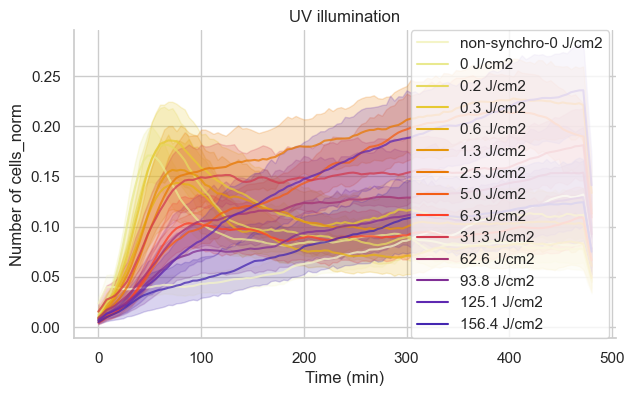

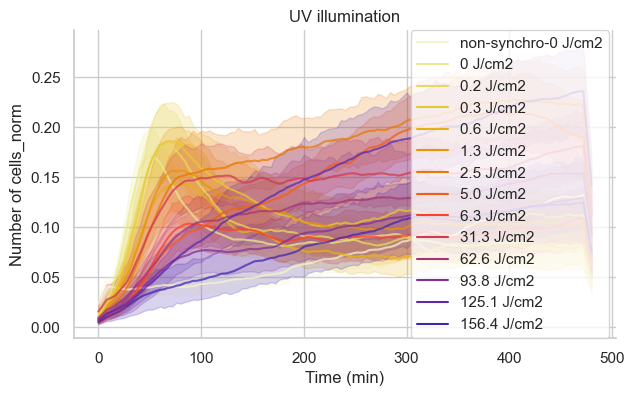

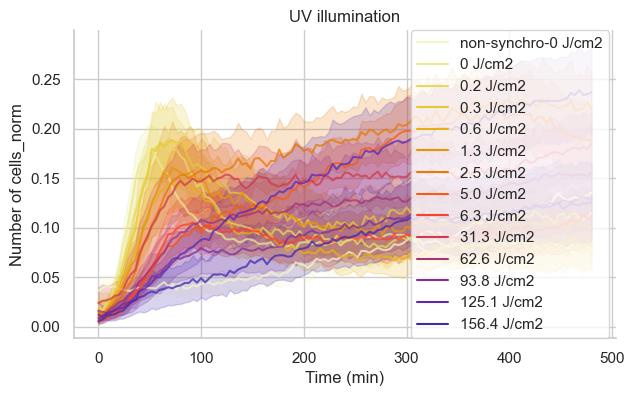

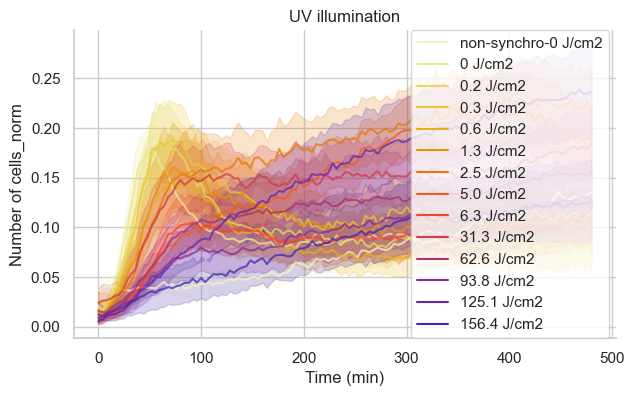

In [6]:
## Rename the columns to get the proper naming of the axis
data = data.rename(columns={'mitosis': 'Number of cells', 
                            'mitosis_normalised': 'Norm. Number of cells'}) 
## There is raw and smooth data. We show the smooth data (with a moving average of kernel 5) for the plots.
groups = np.unique(data["processing"])
## name of the variable to display in the plot.
y_var = "Number of cells" # "Norm. Number of cells"
cell_fov = 134.59
norm = True 
if norm is True:
    data[y_var + '_norm'] = data[y_var]/cell_fov
    plot_y_var = y_var + '_norm'
else:
    plot_y_var = y_var

fig_format = ["png", "pdf"]
for g in groups:
    # sns.set_style()
    ploting_data = data[data["processing"]==g].reset_index(drop=True)
    title = "UV illumination"
    condition = "Light dose cat" # "Subcategory-02"
    #hue_order = ['Control-sync', 'Synchro', '25ms', '50ms', '100ms', '200ms', '400ms', '800ms',
                 #'01sec', '05sec', '10sec', '15sec', '20sec', '25sec']
    for f in fig_format:
        format_extension = 'pdf'
        name = "{0}_{1}.{2}".format(plot_y_var, g, f)
        display.conditions(ploting_data, plot_y_var, title, condition, output_path, name,
                        hue_order=hue_order, palette=sns.color_palette("CMRmap_r", 17))
        


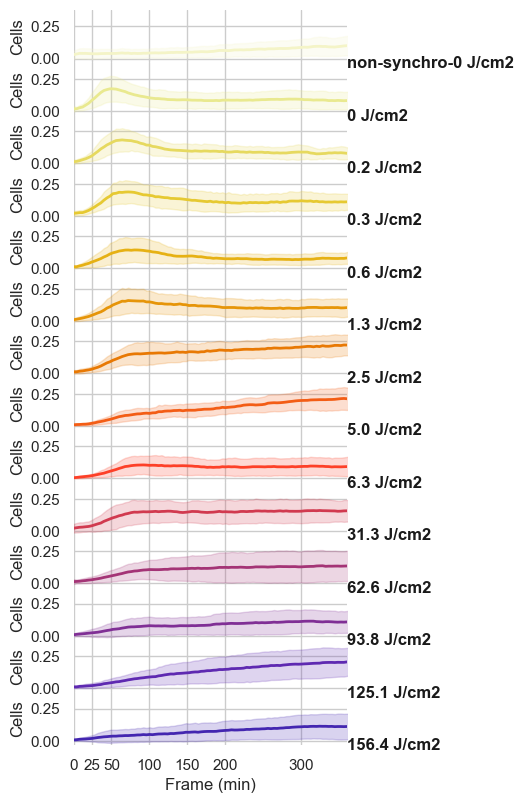

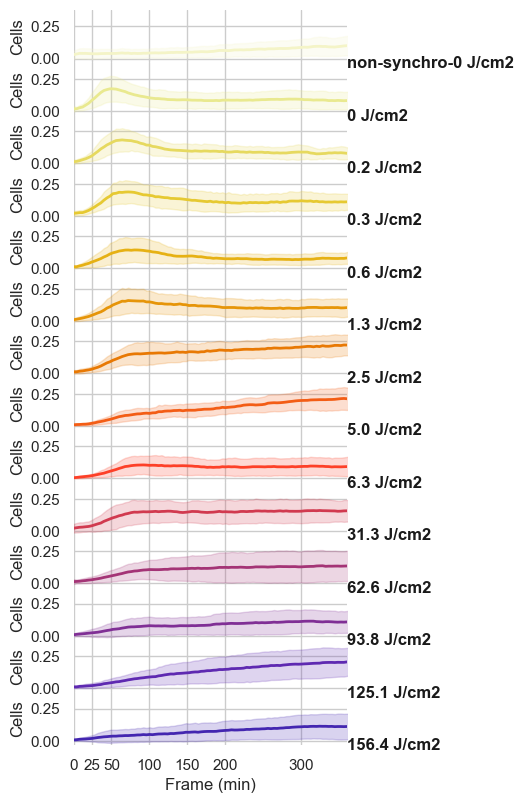

In [7]:
## Order the data for the plot
#hue_order = ['Control-sync', 'Synchro', '25ms', '50ms', '100ms', '200ms', '400ms', '800ms',
#             '01sec', '05sec', '10sec', '15sec', '20sec', '25sec']

hue_order = ['non-synchro-0 J/cm2', '0 J/cm2', '0.2 J/cm2',
             '0.3 J/cm2', '0.6 J/cm2', '1.3 J/cm2', '2.5 J/cm2',
             '5.0 J/cm2', '6.3 J/cm2', '31.3 J/cm2', 
             '62.6 J/cm2', '93.8 J/cm2', '125.1 J/cm2', '156.4 J/cm2']

fig_format = ["png", "pdf"]
for f in fig_format:
    name = "{0}.{1}".format(plot_y_var, f) # name we want to give to the plot
    new_name="cells_vertical_subplots_{}".format(name)

    display.vertical_distributions(data, plot_y_var, output_path, 
                                   new_name, 
                                   raw="Light dose cat",
                                   hue="Light dose cat", 
                                   hue_order=hue_order, 
                                   palette=sns.color_palette("CMRmap_r", 17))
    

## Plot peak data

### Calculate the mitosis peaks for each video

In [8]:
y_var = "Number of cells" # "Norm. Number of cells"
cell_fov = cell_fov # 134.59
norm = True 
if norm is True:
    data[y_var + '_norm'] = data[y_var]/cell_fov
    plot_y_var = y_var + '_norm'
else:
    plot_y_var = y_var
    
# Integrate the information about the temporal peaks of mitosis
data_peaks = quantify_peaks(data, plot_y_var)

data_peaks = photofitt.utils.numerical_dose(data_peaks, column_name="Subcategory-02", power=6.255662)
## Generate categorical variables for the light dose
light_dose = np.unique(data_peaks["Light dose"])
data_peaks["Light dose cat"] = ''
for l in light_dose:
    if l > 0:
        cat = np.str(np.round(l, decimals=1)) + " J/cm2"
    else:
        cat = 'non-synchro-0 J/cm2'
    
    data_peaks["Light dose cat"][data_peaks["Light dose"]==l] = cat
data_peaks["Light dose cat"][data_peaks["Subcategory-02"]=="Synchro"] = '0 J/cm2'

### Display the peak information for each condition

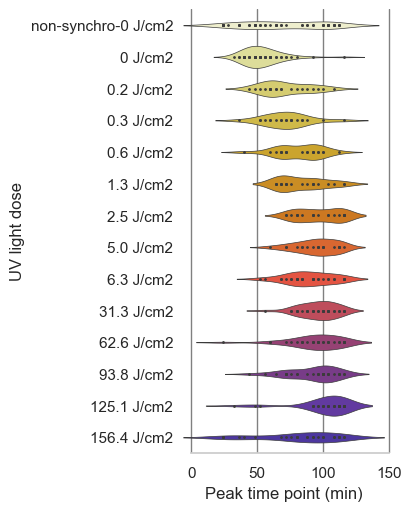

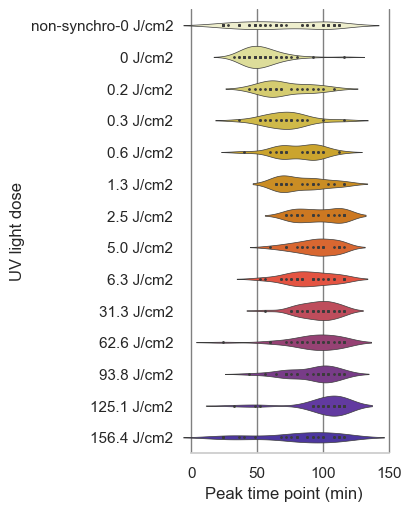

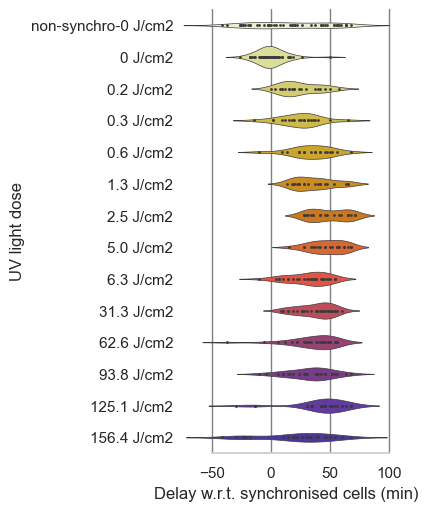

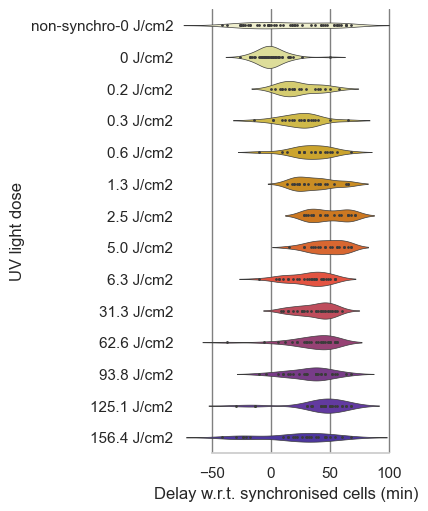

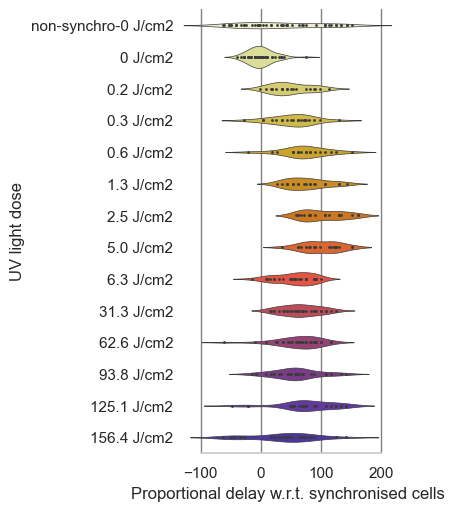

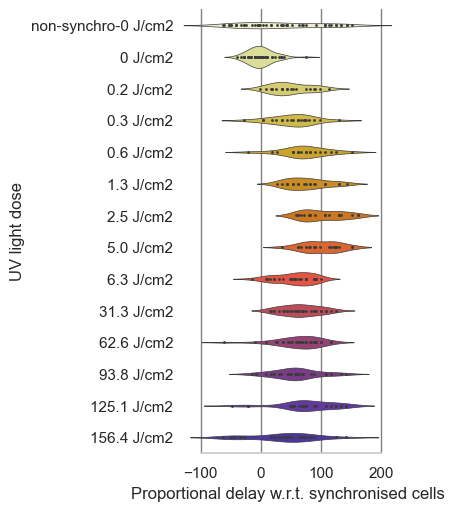

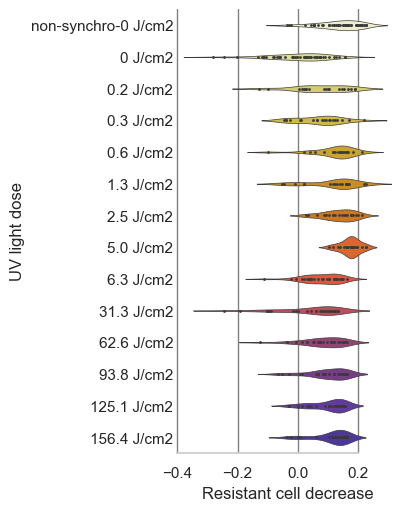

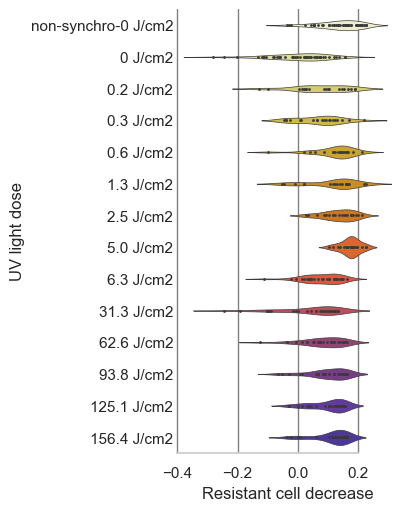

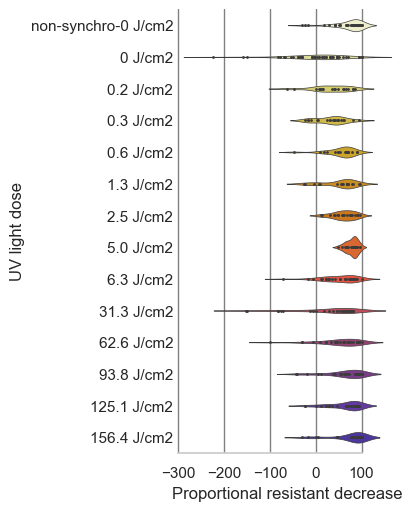

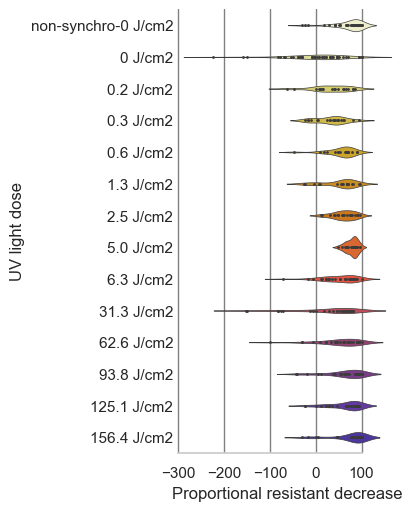

In [9]:
#### Show each distribution with both violins and points

## Rename the columns to get the proper naming in the plots
data_peaks = data_peaks.rename(columns={'peak_time': 'Peak time point (min)', 
                            'delay_synchro': 'Delay w.r.t. synchronised cells (min)',
                           'proportional_delay_synchro': 'Proportional delay w.r.t. synchronised cells'})

x_var = ["Peak time point (min)", "Delay w.r.t. synchronised cells (min)",
         "Proportional delay w.r.t. synchronised cells", "Resistant cell decrease",
         "Proportional resistant decrease"]
fig_format = ["png", "pdf"]
for x in x_var:
    for f in fig_format:
        name = "{0}.{1}".format(x, f) # name we want to give to the plot
        new_name="peaktime_violin_horizontal_exposure_time{}".format(name)
 #       display.violinplots_horizontal(data_peaks,"Subcategory-02", x, output_path, new_name, hue_order,
 #                              palette=sns.color_palette("CMRmap_r", 17))
        display.violinplots_horizontal(data_peaks,'Light dose cat', x,
                                       output_path, new_name, hue_order,
                                       palette=sns.color_palette("CMRmap_r", 17),
                                       ylabel=f"UV light dose")
        
    

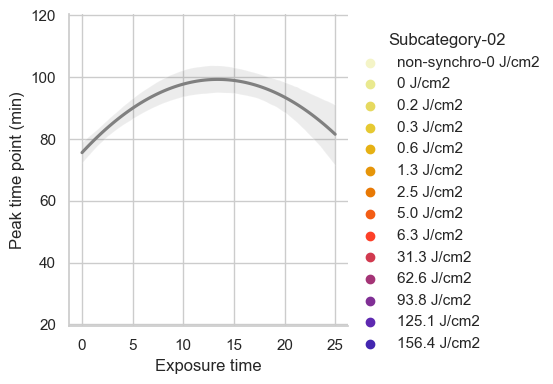

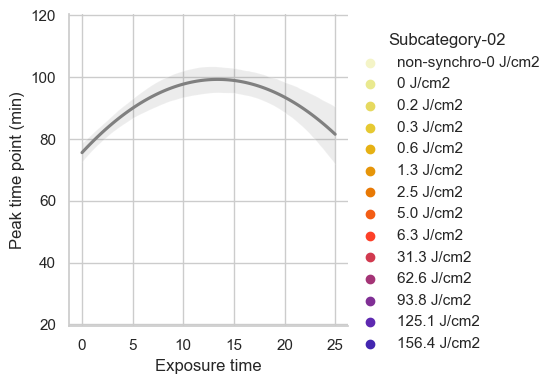

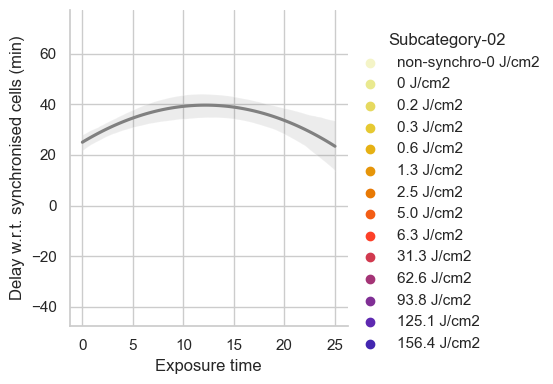

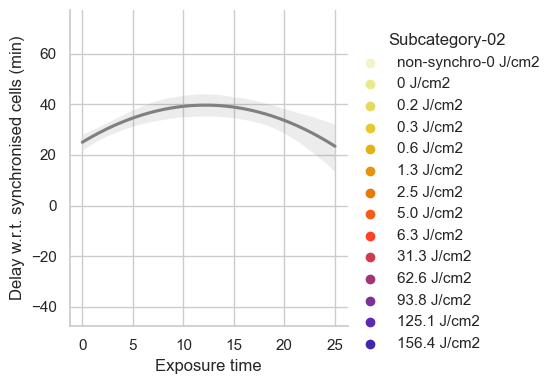

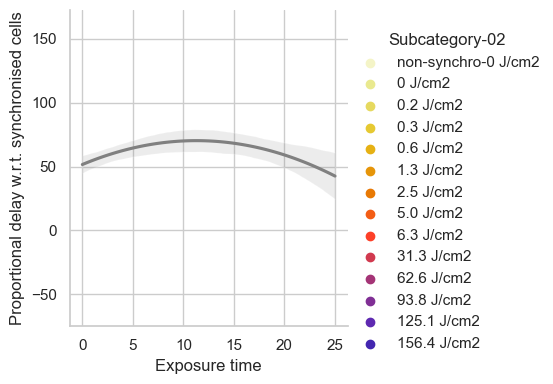

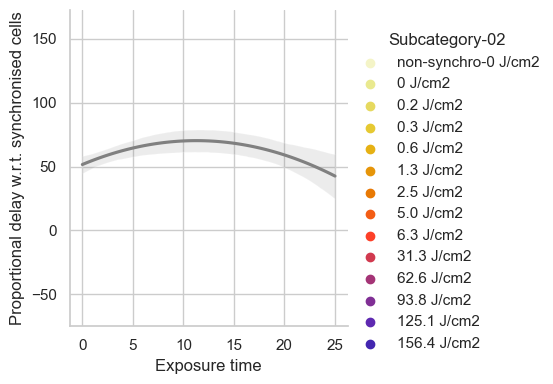

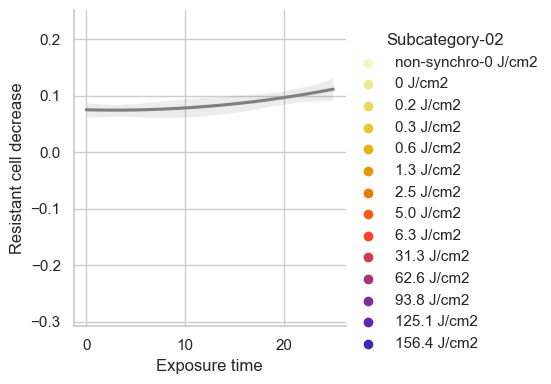

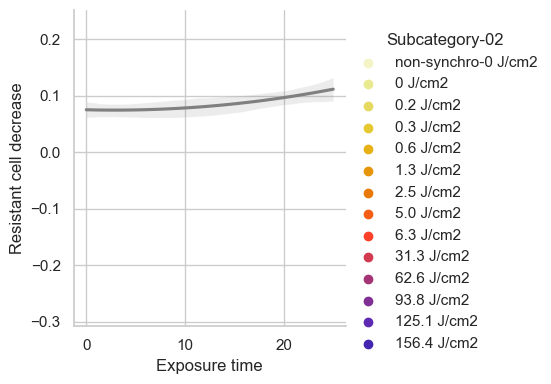

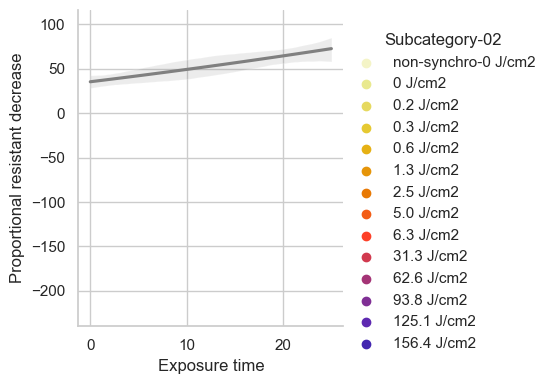

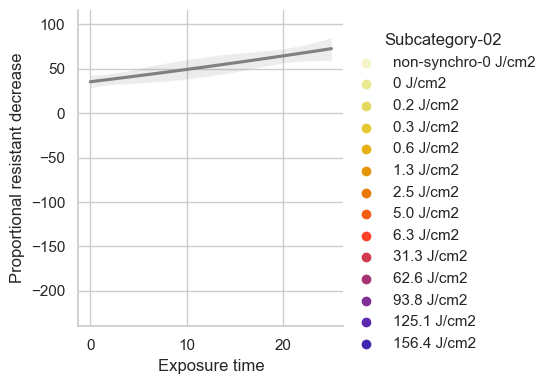

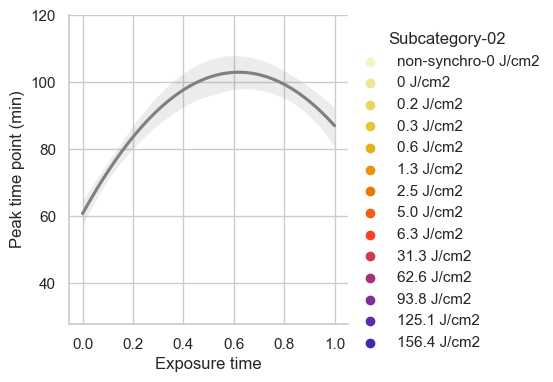

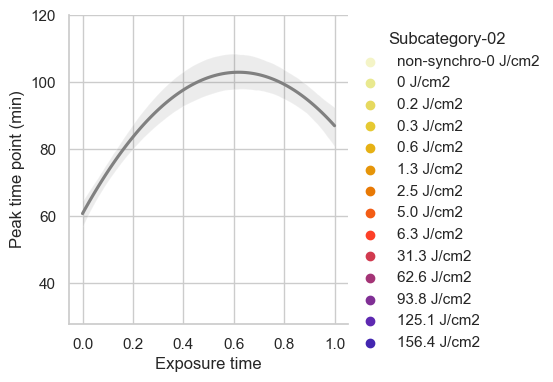

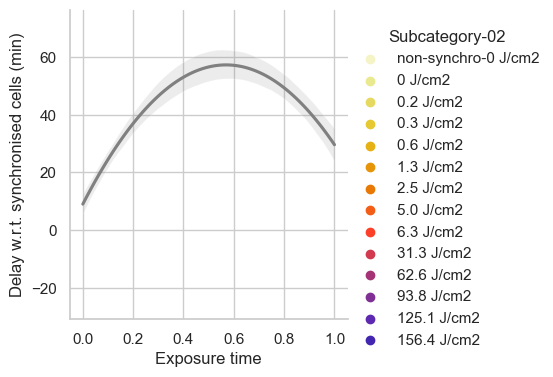

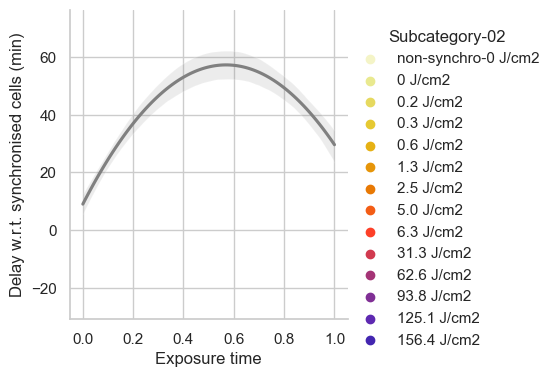

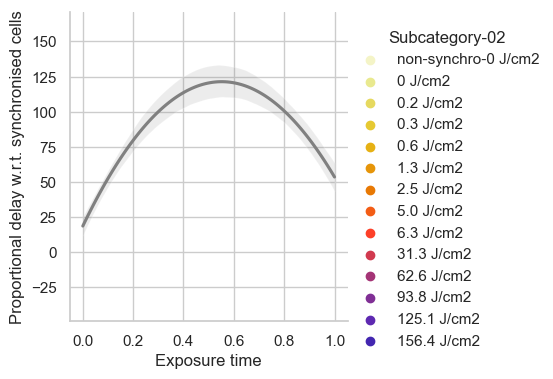

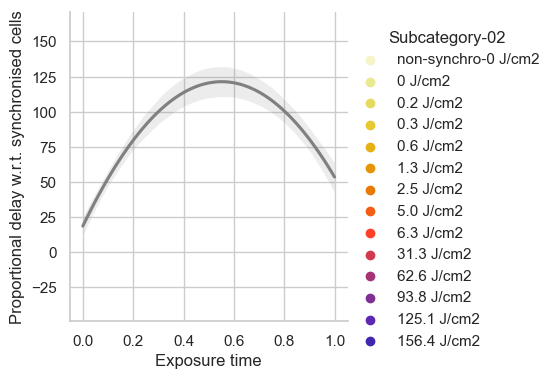

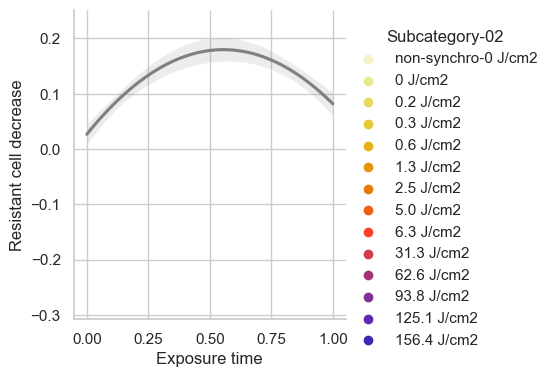

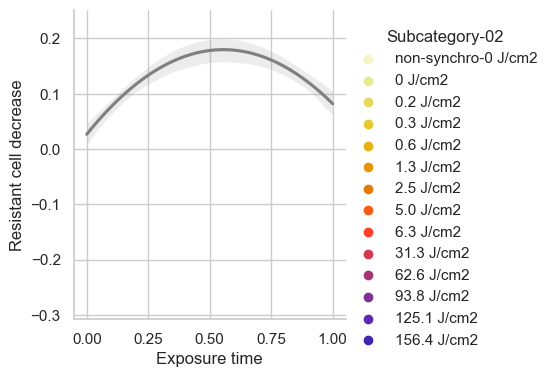

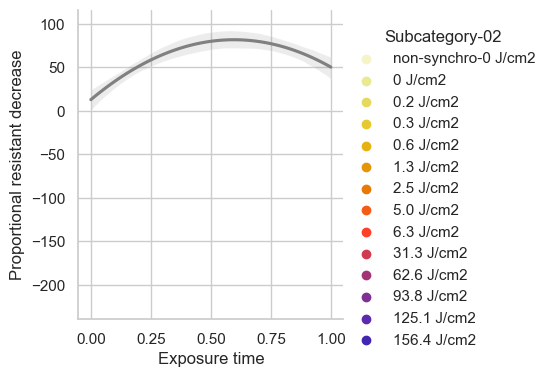

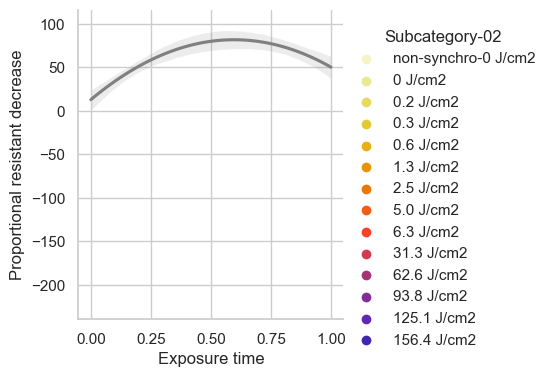

In [10]:
data_peaks_regression = data_peaks[data_peaks["Exposure time"]>=0]
#data_peaks_regression = data_peaks_regression[data_peaks_regression["Exposure time"]<=1]
x_var = ["Peak time point (min)", "Delay w.r.t. synchronised cells (min)",
         "Proportional delay w.r.t. synchronised cells", "Resistant cell decrease",
         "Proportional resistant decrease"]
fig_format = ["png", "pdf"]
for x in x_var:
    for f in fig_format:
        name = "{0}.{1}".format(x, f) # name we want to give to the plot
        new_name="peaktime_regression_{}".format(name)
        display.regressionfit(data_peaks_regression, x, "Exposure time", output_path, new_name, 
                              hue="Subcategory-02", hue_order=hue_order, spline_order=2,
                              height=4, aspect=1, palette=sns.color_palette("CMRmap_r", 17))
        
data_peaks_regression = data_peaks_regression[data_peaks_regression["Exposure time"]<=1]
for x in x_var:
    for f in fig_format:
        name = "{0}.{1}".format(x, f) # name we want to give to the plot
        new_name="peaktime_regression_limited_{}".format(name)
        display.regressionfit(data_peaks_regression, x, "Exposure time", output_path, new_name, 
                              hue="Subcategory-02", hue_order=hue_order, spline_order=2,
                              height=4, aspect=1, palette=sns.color_palette("CMRmap_r", 17))


## Display cell activity after mitosis

In [11]:
## Path to the cell growth data:
# Load UV mitosis data:
path_growth_data = os.path.join(folder, "data/dynamics_intensity_WL UV - high density.csv")
activity_metrics = pd.read_csv(path_growth_data)
activity_metrics = photofitt.utils.numerical_dose(activity_metrics, column_name="Subcategory-02", power=light_power)

## Generate categorical variables for the light dose
light_dose = np.unique(activity_metrics["Light dose"])
activity_metrics["Light dose cat"] = ''
for l in light_dose:
    if l > 0:
        cat = np.str(np.round(l, decimals=1)) + " J/cm2"
    else:
        cat = 'non-synchro-0 J/cm2'
    
    activity_metrics["Light dose cat"][activity_metrics["Light dose"]==l] = cat
activity_metrics["Light dose cat"][activity_metrics["Subcategory-02"]=="Synchro"] = '0 J/cm2'

hue_order = ['non-synchro-0 J/cm2', '0 J/cm2', '0.2 J/cm2',
             '0.3 J/cm2', '0.6 J/cm2', '1.3 J/cm2', '2.5 J/cm2',
             '5.0 J/cm2', '6.3 J/cm2', '31.3 J/cm2', 
             '62.6 J/cm2', '93.8 J/cm2', '125.1 J/cm2', '156.4 J/cm2']

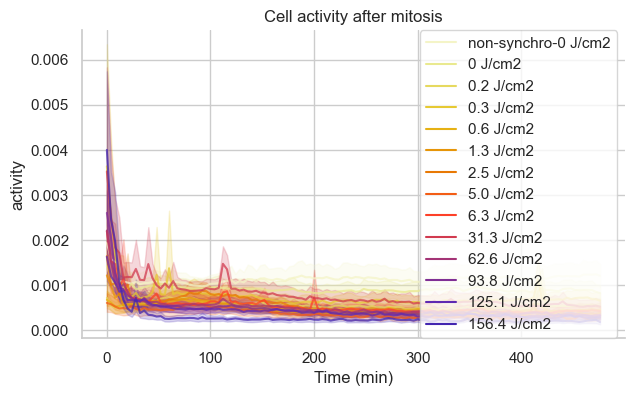

In [14]:
y_var = "activity"
hue="Light dose cat" # "Subcategory-02"
format_extension = 'png'
name = "cell_actitivity.{}".format(format_extension)
title = "Cell activity after mitosis"
display.conditions(activity_metrics, y_var, 
                   title, 
                   hue, 
                   output_path, name, 
                   hue_order=hue_order,
                   palette=sns.color_palette("CMRmap_r", 17))

### Analysis of the cell growth after the peak in mitosis
We will average the dynamics and compute the cummulative sum after mitosis to estimate the dynamics of the daughter cells growing

In [15]:
activity_dataframe, activity_metrics = cumulative_activity(activity_metrics, y_var, use_starting_point="event peak", data_peaks=data_peaks)

#### Display the cummulative results

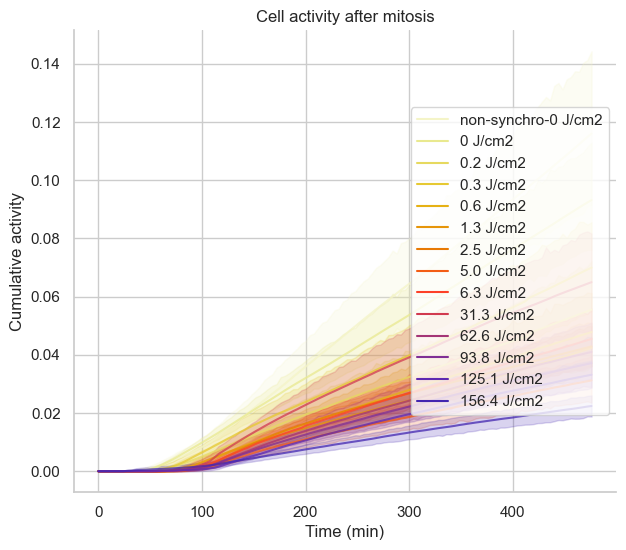

In [16]:
y_var_cum = f"Cumulative {y_var}"
hue = "Light dose cat"
format_extension = 'png'
name = "cell_cummulative_growth_from_peak.{}".format(format_extension)

display.conditions(activity_metrics, y_var_cum, 
                   title, 
                   hue, 
                   output_path, name, 
                   hue_order=hue_order,
                   palette=sns.color_palette("CMRmap_r", 17),
                   figsize=(7, 6))

#### Display the violin plots of the averaged cell growth vertically distributed

In [17]:
activity_dataframe = photofitt.utils.numerical_dose(activity_dataframe, column_name="Subcategory-02", power=6.255662)
## Generate categorical variables for the light dose
light_dose = np.unique(activity_dataframe["Light dose"])
activity_dataframe["Light dose cat"] = ''
for l in light_dose:
    if l > 0:
        cat = np.str(np.round(l, decimals=1)) + " J/cm2"
    else:
        cat = 'non-synchro-0 J/cm2'
    
    activity_dataframe["Light dose cat"][activity_dataframe["Light dose"]==l] = cat
activity_dataframe["Light dose cat"][activity_dataframe["Subcategory-02"]=="Synchro"] = '0 J/cm2'

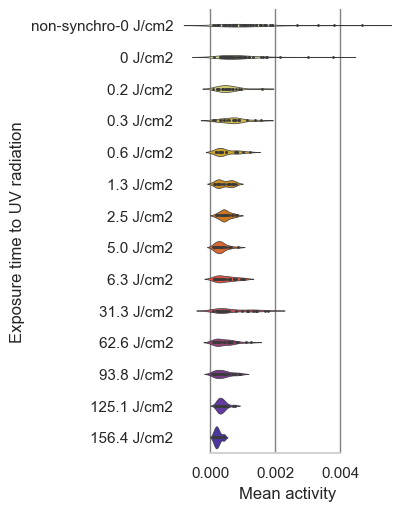

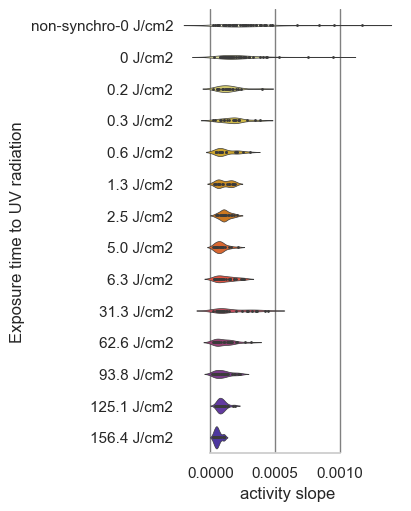

In [18]:
x_var = ['Mean activity', "activity slope"]
format_extension='png'
for x in x_var:
    
    name = "{0}.{1}".format(x, format_extension) # name we want to give to the plot
    new_name="peaktime_violin_horizontal_light_dose_{}".format(name)
    display.violinplots_horizontal(activity_dataframe,'Light dose cat', x, output_path, new_name, hue_order,
                           palette=sns.color_palette("CMRmap_r", 17))

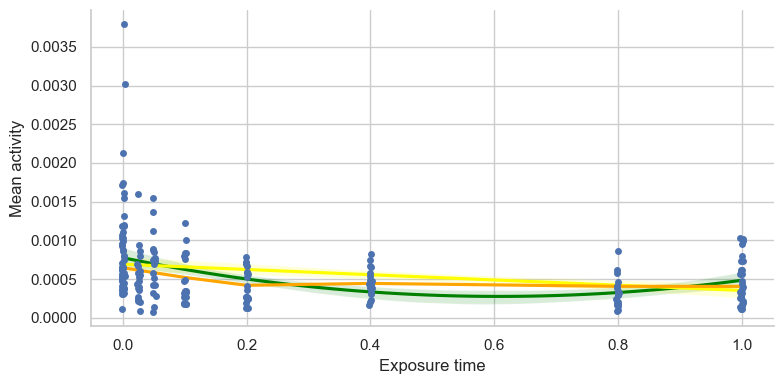

In [19]:
activitymotion_dataframe=activity_dataframe.reset_index(drop=True)
activity_dataframe_regression = activity_dataframe[activity_dataframe["Exposure time"]>=0]
activity_dataframe_regression = activity_dataframe_regression[activity_dataframe_regression["Exposure time"]<=1]
x_var = ["Peak time point (min)", "Delay w.r.t. synchronised cells (min)",
         "Proportional delay w.r.t. synchronised cells"]

x = 'Mean activity'
f = sns.catplot(
    data = activity_dataframe_regression, x="Exposure time", y=x, 
    #hue="Subcategory-02", hue_order=hue_order, palette=sns.color_palette("CMRmap_r", 17),
    native_scale=True, height=4, aspect=2
)
sns.regplot(
    data = activity_dataframe_regression, x="Exposure time", y=x,
    scatter=False, truncate=True, order=2, color="green",#6
)
sns.regplot(
    data = activity_dataframe_regression, x="Exposure time", y=x,
    scatter=False, truncate=True, order=1, color="yellow"#2
)
sns.regplot(
    data = activity_dataframe_regression, x="Exposure time", y=x,lowess=True, 
    scatter=False, truncate=True, order=1, color="orange"
)

## Set style
custom_params = {"axes.spines.right": False, "axes.spines.top": False}    
sns.plotting_context("paper")
sns.set(font_scale=1)
sns.set_theme(style="whitegrid", rc=custom_params)

format_extension = 'png'
name = "{0}.{1}".format(x, format_extension) # name we want to give to the plot
new_name="growth_regression_firstrange_{}".format(name)
f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True, dpi=300)
format_extension = 'pdf'
name = "{0}.{1}".format(x, format_extension) # name we want to give to the plot
new_name="growth_regression_firstrange_{}".format(name)
f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True,dpi=300)

# plt.xlim([-0.2, 1.2])
# format_extension = 'png'
# name = "{0}.{1}".format(x, format_extension) # name we want to give to the plot
# new_name="growth_regression_firstrange_lim_{}".format(name)
# f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True, dpi=300)
# format_extension = 'pdf'
# name = "{0}.{1}".format(x, format_extension) # name we want to give to the plot
# new_name="growth_regression_firstrange_lim_{}".format(name)
# f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True,dpi=300)

## Plot the results for different wavelengths

### Fuse data with new results

In [20]:
new_exp = pd.read_csv("/Users/esti/Documents/PROYECTOS/PHX/mitosis_mediated_data_itqb_3/CHO/results/scaled_1.5709_results/new-data/mitosis_counting.csv")
u_col = [col for col in new_exp.columns if col.__contains__("Unnamed")]
new_exp = new_exp.drop(u_col, axis=1)
new_exp = new_exp.reset_index(drop=True)
## Correct data
index = new_exp[new_exp["Subcategory-00"]=="20230504_630_night"].index.to_list()
for i in index:
    vn = new_exp['video_name'].iloc[i]
    if vn.__contains__("A01"):
        new_exp['Subcategory-02'].iloc[i] = "Synchro"

UV
['2022-08-03' '2022-08-03-night' '2022-08-09' '2022-08-09-night'
 '2022-08-10']
475
['2022-09-07-day' '2022-09-07-night' '2022-09-08-day' '20220929_night'
 '20230503_475_night' '20230505_475_day']
568
['2022-08-12']
630
['2022-09-09-day' '20220928_day' '20220928_night' '20221012_night'
 '20221013_night' '20221014' '20230504_630_day' '20230504_630_night']


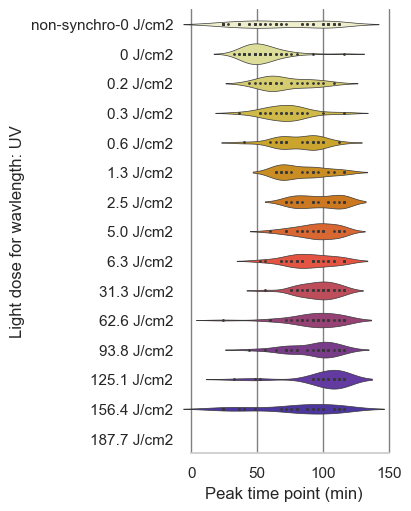

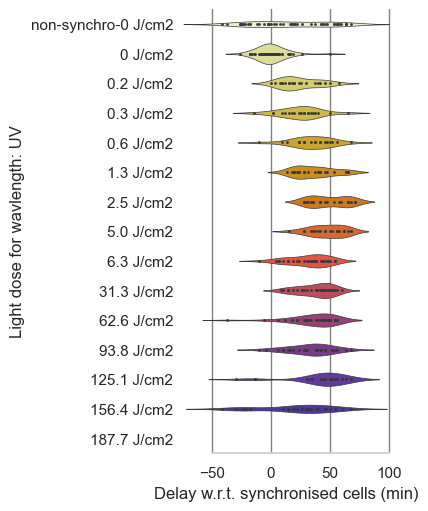

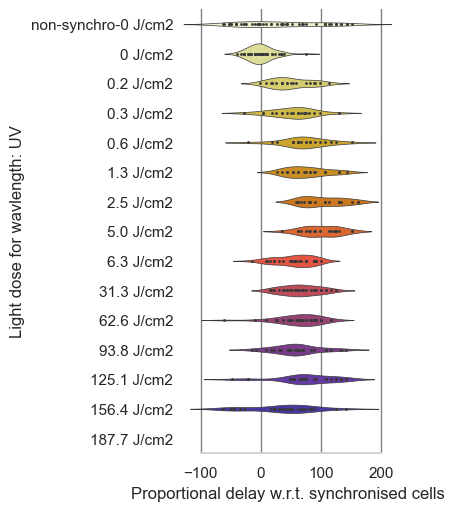

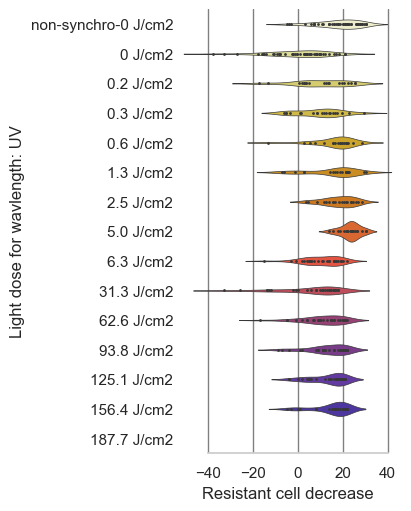

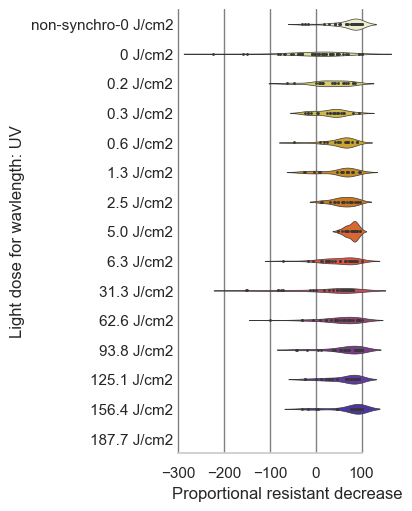

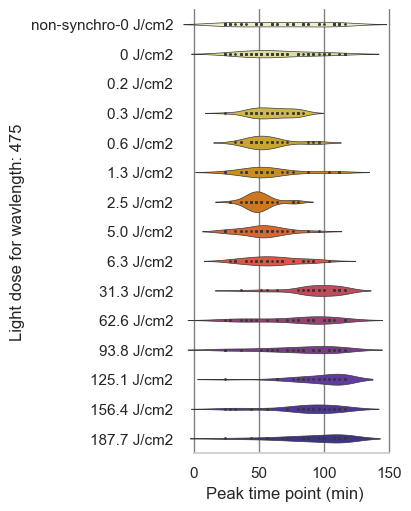

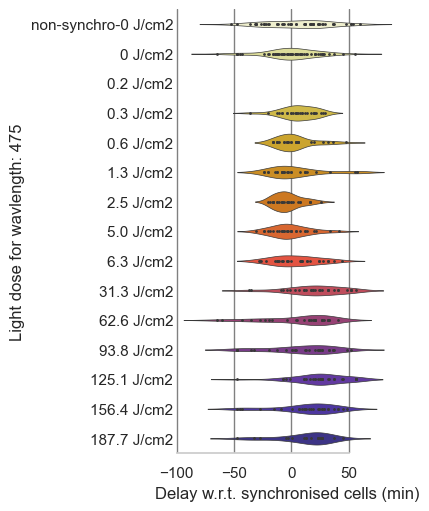

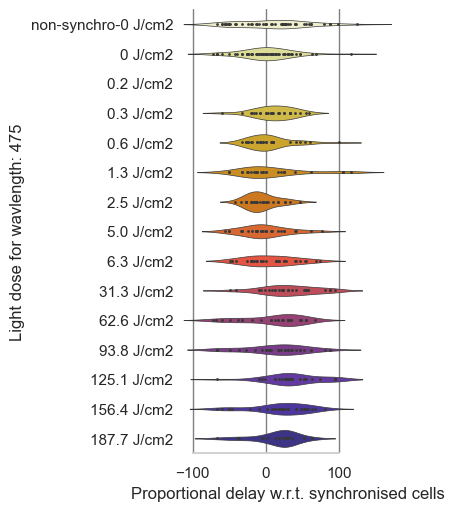

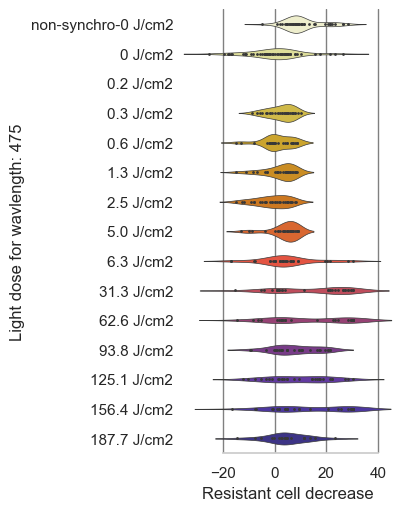

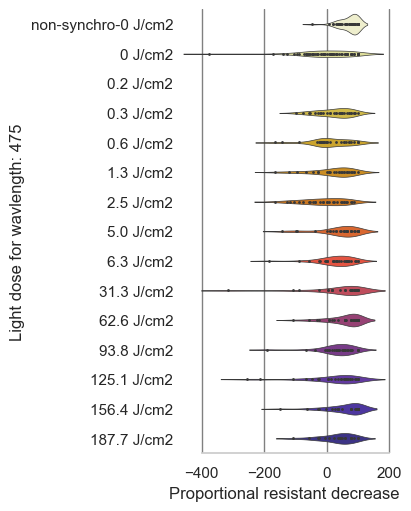

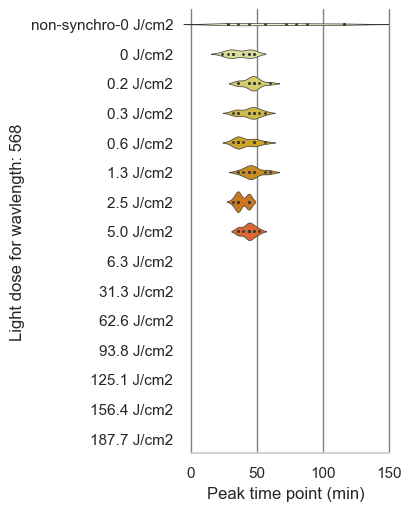

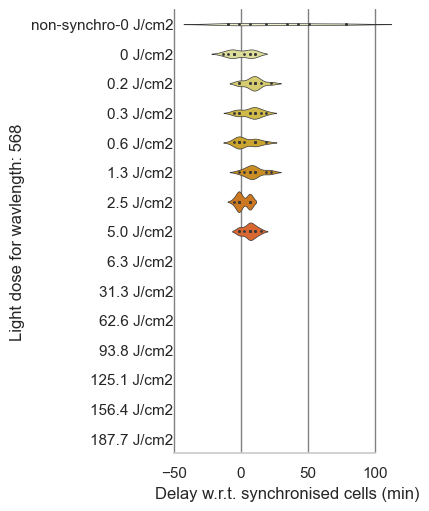

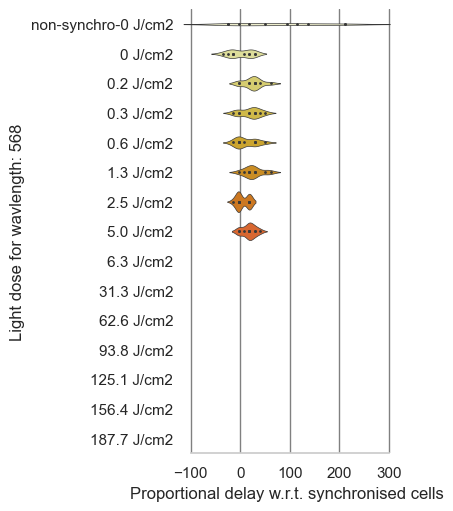

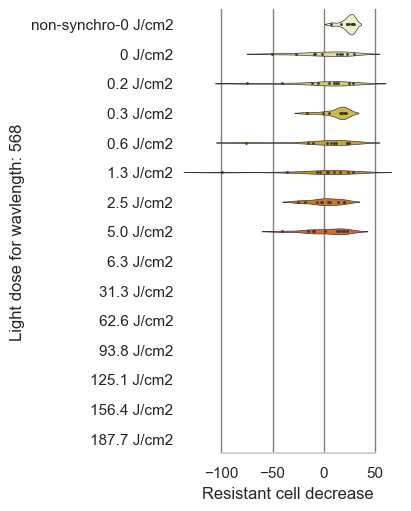

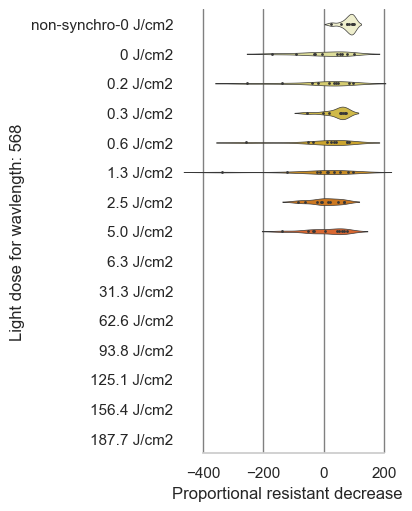

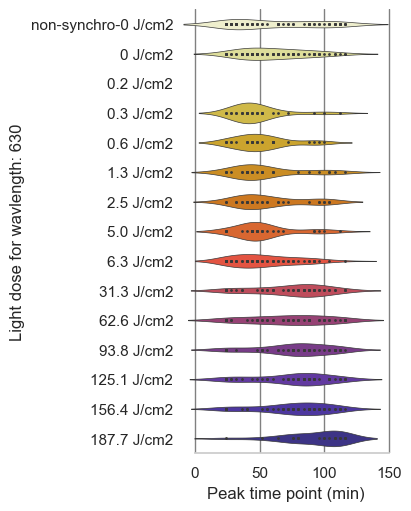

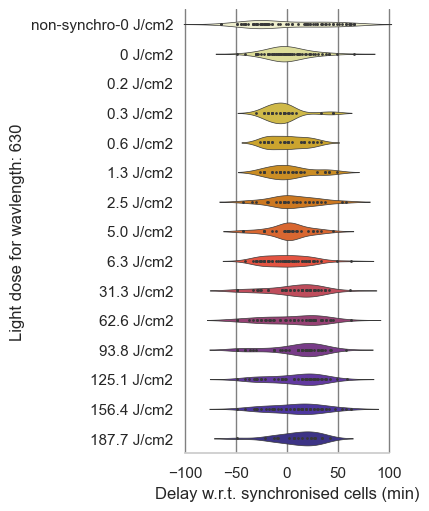

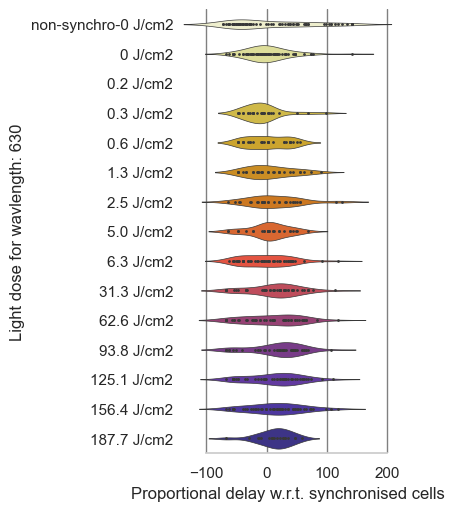

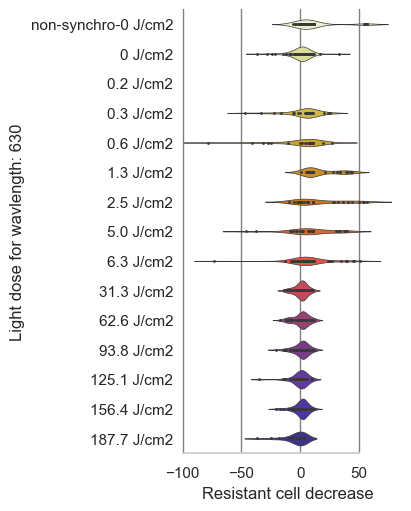

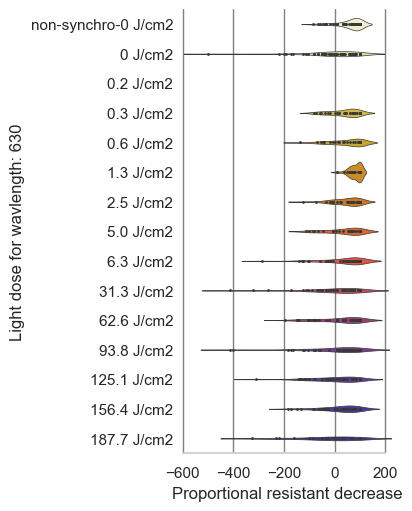

In [21]:
wl = ["UV", "475", "568", "630"]
hue_order = ['non-synchro-0 J/cm2', '0 J/cm2', '0.2 J/cm2',
             '0.3 J/cm2', '0.6 J/cm2', '1.3 J/cm2', '2.5 J/cm2',
             '5.0 J/cm2', '6.3 J/cm2', '31.3 J/cm2', 
             '62.6 J/cm2', '93.8 J/cm2', '125.1 J/cm2', '156.4 J/cm2', '187.7 J/cm2']
format_extension = "png"

x_var = ["Peak time point (min)", "Delay w.r.t. synchronised cells (min)",
         "Proportional delay w.r.t. synchronised cells", "Resistant cell decrease",
         "Proportional resistant decrease"]



data = None
for w in wl:
    new_data = pd.read_csv(os.path.join(folder, "data/mitosis_CHO_{}_clean.csv".format(w)))
    print(w)
    # Change the name of exposure times
    Con = [c for c in np.unique(new_data["Subcategory-02"]) if c.__contains__("UV")]

    for i in Con:
        new_condition_name = i.split("UV")[1]
        new_data["Subcategory-02"][new_data["Subcategory-02"]==i] = new_condition_name
    
    u_col = [col for col in new_data.columns if col.__contains__("Unnamed")]
    new_data = new_data.drop(u_col, axis=1)
    ## Rename the columns to get the proper naming of the axis
    new_data = new_data.rename(columns={'mitosis': 'Number of cells', 
                                'mitosis_normalised': 'Norm. Number of cells'})
    
    wl_exp = new_exp[new_exp["Subcategory-01"]==new_data["Subcategory-01"].iloc[0]]
    if len(wl_exp):
        new_data = pd.concat([new_data, wl_exp]).reset_index(drop=True)
        new_data.to_csv(os.path.join(folder, "data/mitosis_CHO_{}_clean_new.csv".format(w)))
    
    print(np.unique(new_data["Subcategory-00"]))
    data_peaks = quantify_peaks(new_data, 'Number of cells')
    
    
    
    # Estimate the ligth dose
    data_peaks = photofitt.utils.numerical_dose(data_peaks, column_name="Subcategory-02", power=light_power)

    ## Generate categorical variables for the light dose
    light_dose = np.unique(data_peaks["Light dose"])
    data_peaks["Light dose cat"] = ''
    for l in light_dose:
        if l > 0:
            cat = np.str(np.round(l, decimals=1)) + " J/cm2"
        else:
            cat = 'non-synchro-0 J/cm2'

        data_peaks["Light dose cat"][data_peaks["Light dose"]==l] = cat
    data_peaks["Light dose cat"][data_peaks["Subcategory-02"]=="Synchro"] = '0 J/cm2'
    
    ## Rename the columns to get the proper naming in the plots
    data_peaks = data_peaks.rename(columns={'peak_time': 'Peak time point (min)', 
                            'delay_synchro': 'Delay w.r.t. synchronised cells (min)',
                           'proportional_delay_synchro': 'Proportional delay w.r.t. synchronised cells'})
    for x in x_var:
        name = f"{x}_{w}.{format_extension}"# name we want to give to the plot
        new_name=f"peaktime_violin_horizontal_light_dose_{name}"
        display.violinplots_horizontal(data_peaks,'Light dose cat', x,
                                       output_path, new_name, hue_order,
                                       palette=sns.color_palette("CMRmap_r", 17),
                                       ylabel=f"Light dose for wavlength: {w}")
    
    
    if data is None:
        data = data_peaks
    else:
        data = pd.concat([data, data_peaks]).reset_index(drop=True)
# Integrate the information about the temporal peaks of mitosis


### Analyse

In [22]:
np.unique(data["Subcategory-01"])

array(['WL 475 - high density', 'WL 568 - high density',
       'WL 630 - high density', 'WL UV - high density'], dtype=object)

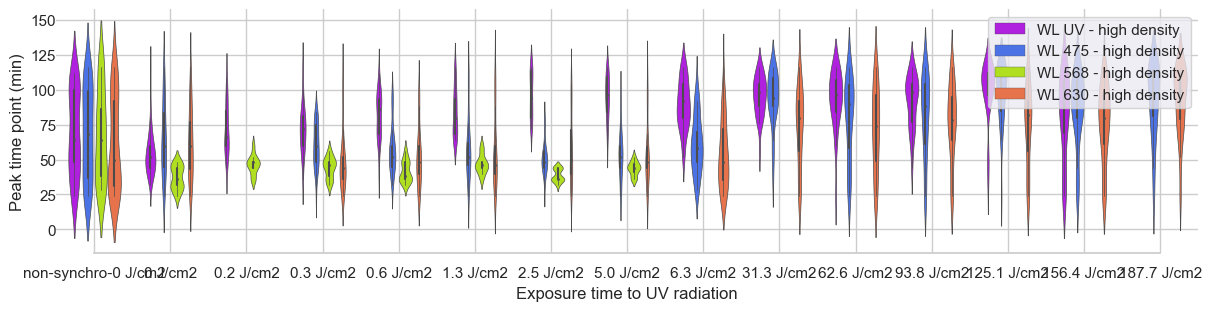

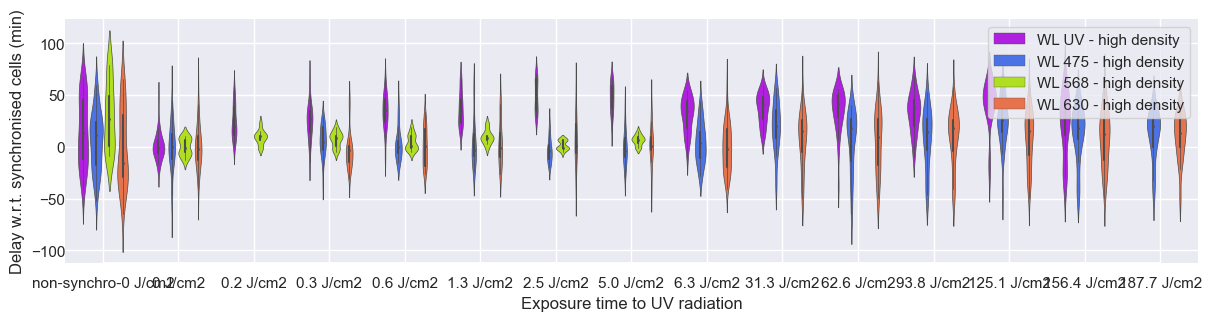

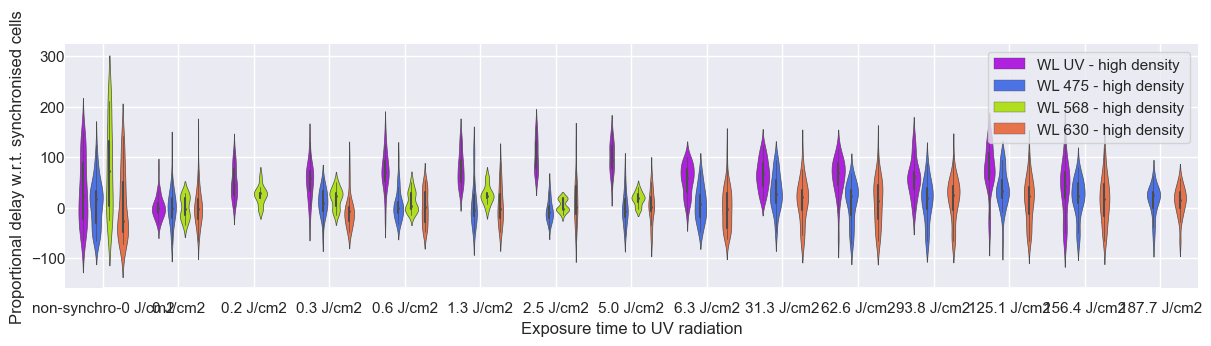

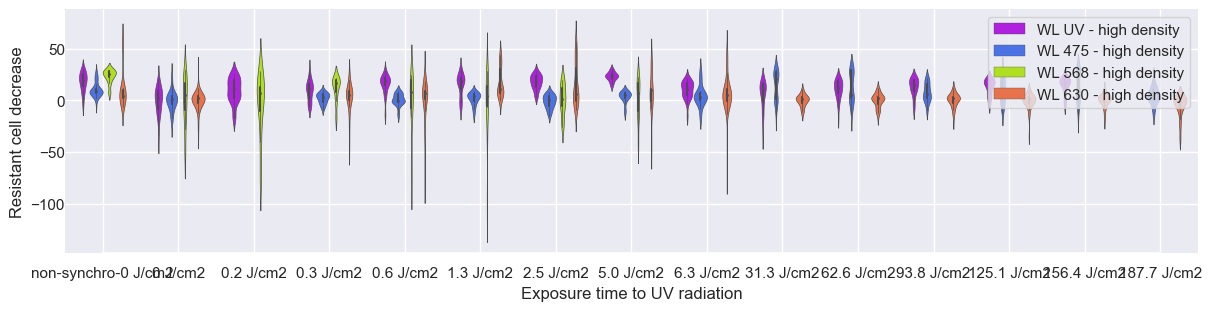

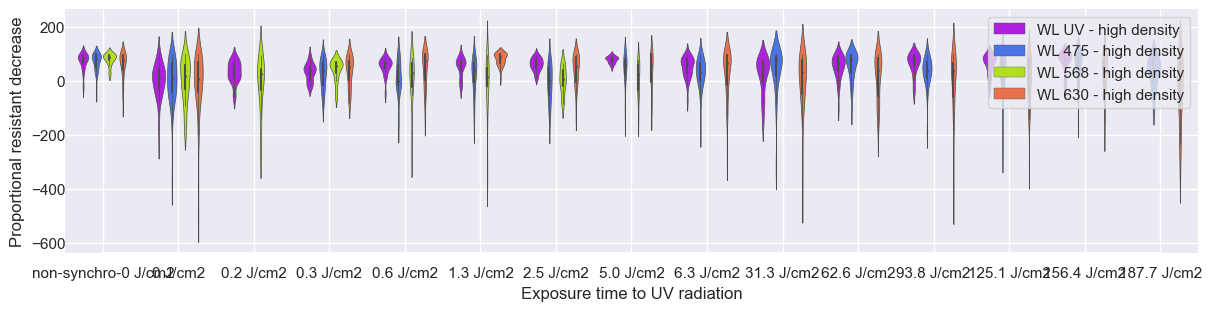

In [23]:
#### Show each distribution with both violins and points
wl=[ 'WL UV - high density', 'WL 475 - high density', 'WL 568 - high density','WL 630 - high density']

## Rename the columns to get the proper naming in the plots
data = data.rename(columns={'peak_time': 'Peak time point (min)', 
                            'delay_synchro': 'Delay w.r.t. synchronised cells (min)',
                           'proportional_delay_synchro': 'Proportional delay w.r.t. synchronised cells'})

x_var = ["Peak time point (min)", "Delay w.r.t. synchronised cells (min)",
         "Proportional delay w.r.t. synchronised cells", "Resistant cell decrease",
         "Proportional resistant decrease"]

# Create an array with the colors you want to use
colors = [ "#bf00ff", "#3366ff", "#bfff00", "#ff6633"]# Set your custom color palette
palette = sns.color_palette(colors)

for x in x_var:
    f, ax = plt.subplots(figsize=(12, 3), constrained_layout=True)
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.plotting_context("paper")
    sns.set_theme(style="ticks", rc=custom_params)
    sns.set(font_scale=1)
    ax.yaxis.set_tick_params(pad=-6) 
    sns.violinplot(data=data, palette=palette,  #palette=sns.color_palette("husl", 14), 
                   bw=.5, orient="v", order=hue_order, hue_order=wl,
                   x="Light dose cat", hue="Subcategory-01", alpha=1,
                   y=x, width=0.7, linewidth=0.5)

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    plt.legend(loc="upper right")
    ax.set(xlabel="Exposure time to UV radiation")
    ax.set(ylabel=x)
    sns.despine(trim=True, left=True)

    format_extension = 'png'
    name = "{0}_wl.{1}".format(x, format_extension) # name we want to give to the plot
    new_name="peaktime_violin_horizontal_{}".format(name)
    f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True, dpi=300)
    format_extension = 'pdf'
    name = "{0}_wl.{1}".format(x, format_extension) # name we want to give to the plot
    new_name="peaktime_violin_horizontal_{}".format(name)
    f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True,dpi=300)
    

WL UV - high density
WL 475 - high density
WL 568 - high density
WL 630 - high density


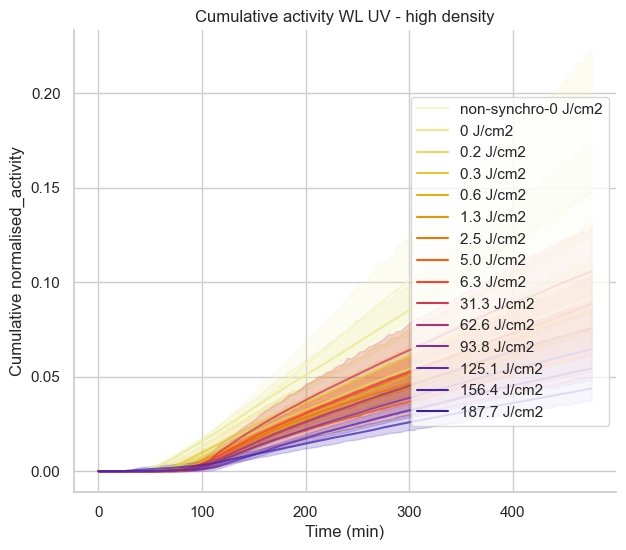

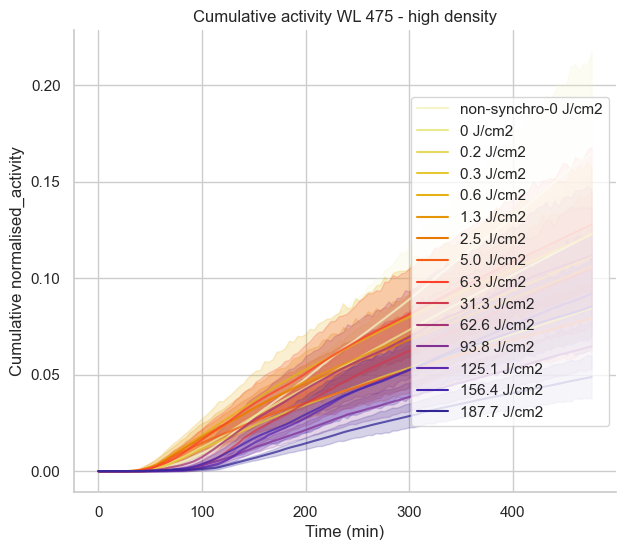

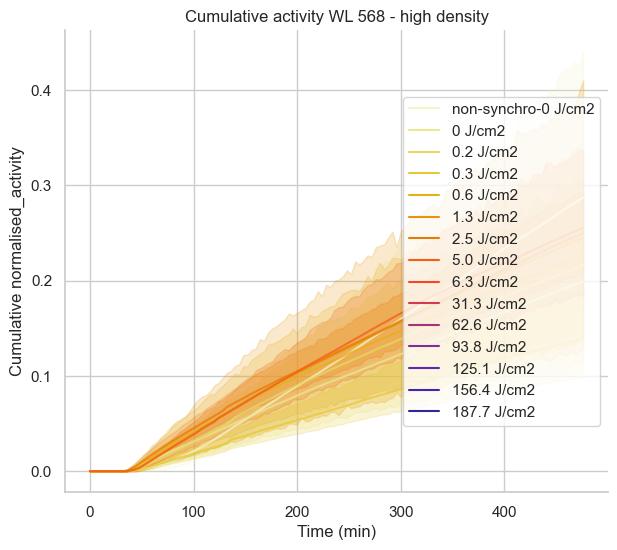

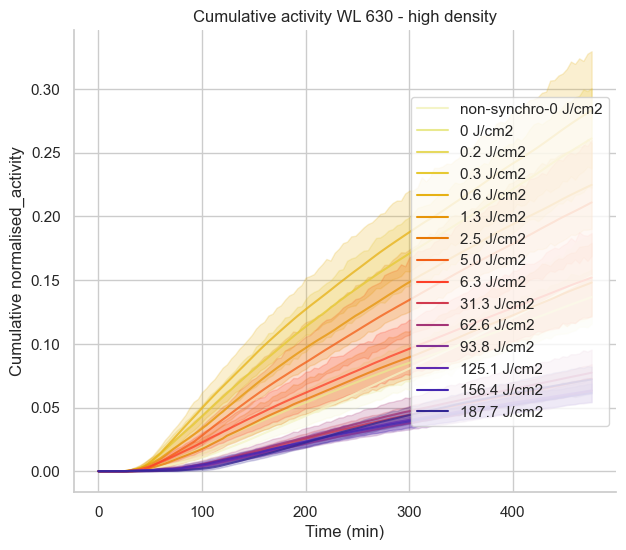

In [24]:
activity_data = pd.read_csv("/Users/esti/Documents/PROYECTOS/PHX/mitosis_mediated_data_itqb_3/CHO/results/scaled_1.5709_results/new-data/data_activity_intensity_synchro.csv")
index = activity_data[activity_data["Subcategory-00"]=='2022-09-08-night'].index.to_list()
activity_data = activity_data.drop(index)
data_uv = activity_data[activity_data["Subcategory-01"]=='WL UV - high density'].reset_index(drop=True)
data_uv.to_csv("/Users/esti/Documents/PROYECTOS/PHX/DOCS/MANUSCRIPT/CODE/data/dynamics_intensity_WL UV - high density_new.csv")

y_var = "normalised_activity"

for w in ['WL UV - high density', 'WL 475 - high density', 'WL 568 - high density','WL 630 - high density']:
    data_w = activity_data[activity_data["Subcategory-01"]==w].reset_index(drop=True)
    print(w)
    if w.__contains__("630"):
        ## Correct data
        index = data_w[data_w["Subcategory-00"]=="20230504_630_night"].index.to_list()
        for i in index:
            vn = data_w['video_name'].iloc[i]
            if vn.__contains__("A01"):
                data_w['Subcategory-02'].iloc[i] = "Synchro"   
        aux = data_w[data_w["Subcategory-00"]=="20220928_night"]
        index = aux[aux["video_name"]=='CHO_630-live_-01-Scene-27-P5-A03'].index.to_list()
        data_w = data_w.drop(index)
        data_w = data_w.reset_index(drop=True)
        
    elif w.__contains__("475"):
        ## Correct data
        data_w_f = data_w[data_w["Subcategory-00"]=="2022-09-07-night"]
        index = data_w_f.index.to_list()
        data_peaks_w = data[data["Subcategory-01"]==w]
        data_peaks_w = data_peaks_w[data_peaks_w["Subcategory-00"]=="2022-09-07-night"]
        videos = [v for v in np.unique(data_w['video_name'].iloc[index]) if v not in np.unique(data_peaks_w["video_name"])]
        
        for v in videos:
            data_w = data_w.drop(data_w_f[data_w_f["video_name"]==v].index.to_list())
        data_w = data_w.reset_index(drop=True)
    
        
    data_w.to_csv(f"/Users/esti/Documents/PROYECTOS/PHX/DOCS/MANUSCRIPT/CODE/data/dynamics_intensity_{w}.csv")
    
    activity_dataframe, activity_metrics = cumulative_activity(data_w, y_var, use_starting_point="event peak", data_peaks=data[data["Subcategory-01"]==w])
    activity_metrics = photofitt.utils.numerical_dose(activity_metrics, column_name="Subcategory-02", power=light_power)

    ## Generate categorical variables for the light dose
    light_dose = np.unique(activity_metrics["Light dose"])
    activity_metrics["Light dose cat"] = ''
    for l in light_dose:
        if l > 0:
            cat = np.str(np.round(l, decimals=1)) + " J/cm2"
        else:
            cat = 'non-synchro-0 J/cm2'

        activity_metrics["Light dose cat"][activity_metrics["Light dose"]==l] = cat
    activity_metrics["Light dose cat"][activity_metrics["Subcategory-02"]=="Synchro"] = '0 J/cm2'
    activity_metrics = activity_metrics.rename(columns={'time_variance': 'Cell growth'})
    
    y_var_cum = f"Cumulative {y_var}"
    hue = "Light dose cat"
    format_extension = 'png'
    name = f"cell_cummulative_growth_from_peak_{w}.{format_extension}"

    display.conditions(activity_metrics, y_var_cum, 
                       f"Cumulative activity {w}", 
                       hue, 
                       output_path, name, 
                       hue_order=hue_order,
                       palette=sns.color_palette("CMRmap_r", 17),
                       figsize=(7, 6))